In [32]:
import geopandas as gpd
import pandas as pd

In [33]:
# Combine utilities
utility_types = ['kolektory', 'produktovod', 'produktovody_prvky', 'prvky_elektriny', 'prvky_produktovodov', 'prvky_telekomunikacii', 'prvky_vodovodnej_siete', 'telekomunikacie', 'vodovody']
utility_gdf = gpd.GeoDataFrame()

for utility in utility_types:
    gdf = gpd.read_file(f'C:/Users/Lenovo/Downloads/utilities/{utility}.shp')
    gdf = gdf.to_crs("EPSG:4326")
    gdf['utility'] = utility
    gdf_preprocessed = gdf[['geometry', 'utility']]
    utility_gdf = pd.concat([utility_gdf, gdf_preprocessed])

In [34]:
# Restrict by bounding box if needed
only_ruzinov = False

if only_ruzinov:
    gdf_ruzinov = gpd.read_file(f'C:/Users/Lenovo/Downloads/utilities/ba2_admin_unit.geojson')
    utilities_ba2 = gpd.sjoin(left_df= utility_gdf, right_df=gdf_ruzinov, how='inner')
    utilities_ba2 = utilities_ba2[['geometry', 'utility']]
    utilities_ba2.reset_index(drop=True, inplace=True )
    utilities_ba2.to_file('C:/Users/Lenovo/Downloads/utilities/combined_utilities_ba2.geojson', driver="GeoJSON")  
else:
    utilities_ba = utility_gdf[['geometry', 'utility']]
utilities_ba    .to_file('C:/Users/Lenovo/Downloads/utilities/combined_utilities_ba.geojson', driver="GeoJSON")  

<Axes: >

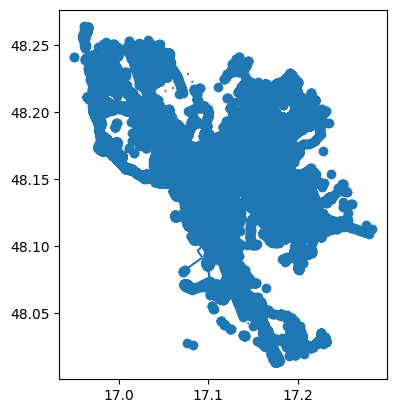

In [36]:
utilities_ba.plot()